In [1]:
# Все для визуализации
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

# Все для работы с данными
import numpy as np
import pandas as pd
import bdorch

In [2]:
# Получаем данные 
df = pd.read_csv('data.csv')
df

,Возраст,Пол,В браке,Количество детей,Уровень образования,Доход в месяц,Тип занятости,Стаж на текущем месте работы (лет),Общий трудовой стаж (лет),Тип жилья,...,Частота смены места работы за последние 5 лет,"Наличие других займов (например, микрозаймы)",Наличие загранпаспорта,Частота поездок за границу за последние 5 лет,Наличие недвижимости кроме основного жилья,Оценка стоимости всего имущества,Уровень финансовой грамотности,Платеж по текущему кредиту в месяц,Количество сданных лаб по информатике,Дефолт
0,33,Мужчина,Да,3,Магистр / Спец,91000,Самозанятый,1,1,Собственное,...,10,5,Нет,20,8,9673000,Средний,85000,0,False
1,45,Мужчина,Нет,1,Нет,100000,ИП,3,3,Собственное,...,6,4,Нет,11,1,8964000,Высокий,35000,0,False
2,40,Женщина,Да,4,Магистр / Спец,85000,ИП,7,7,Собственное,...,6,8,Да,8,10,8215000,Средний,80000,1,False
3,31,Женщина,Нет,1,Школа - 9,83000,Нет работы,8,11,Арендованное,...,10,6,Нет,17,10,3773000,Низкий,32000,2,False
4,35,Мужчина,Да,0,Бакалавр,90000,ООО,4,4,Ипотека,...,5,7,Да,18,0,9070000,Средний,38000,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,47,Женщина,Да,0,Школа - 9,74000,Самозанятый,1,5,Ипотека,...,4,10,Нет,15,5,16558000,Средний,87000,1,False
999996,66,Женщина,Нет,0,Магистр / Спец,75000,ООО,0,3,Арендованное,...,5,5,Да,6,5,8905000,Высокий,72000,1,False
999997,38,Женщина,Нет,2,Колледж,110000,ООО,13,13,Ипотека,...,4,8,Нет,5,6,6852000,Высокий,11000,3,False
999998,45,Женщина,Нет,0,Нет,90000,Самозанятый,9,14,Ипотека,...,5,7,Да,14,2,5268000,Высокий,46000,4,False


In [3]:
# Переводим в числовой формат

df = pd.get_dummies(df, columns=['Пол'])

yn_col = ["В браке", "Наличие автомобиля", "Наличие банковских вкладов", "Страхование жизни", "Наличие загранпаспорта"]

for i in yn_col:
    df[i] = df[i].map({'Нет': 0, 'Да': 1})

edu_levels = ['Нет',
              'Школа - 9',
              'Школа - 11',
              'Колледж',
              'Бакалавр',
              'Магистр / Спец',
              'Аспирант',
              'Доктор наук']

works = ['Нет работы', 'Самозанятый', 'ИП', 'Постоянная работа', 'ООО']

live = ["Арендованное", "Ипотека", "Собственное"]

finance = ["Низкий", "Средний", "Высокий"]

df['Уровень образования'] = df['Уровень образования'].map({edu_levels[i]: i for i in range(len(edu_levels))})
df['Тип занятости'] = df['Тип занятости'].map({works[i]: i for i in range(len(works))})
df['Тип жилья'] = df['Тип жилья'].map({live[i]: i for i in range(len(live))})
df['Уровень финансовой грамотности'] = df['Уровень финансовой грамотности'].map(
    {finance[i]: i for i in range(len(finance))})

df

,Возраст,В браке,Количество детей,Уровень образования,Доход в месяц,Тип занятости,Стаж на текущем месте работы (лет),Общий трудовой стаж (лет),Тип жилья,Наличие автомобиля,...,Наличие загранпаспорта,Частота поездок за границу за последние 5 лет,Наличие недвижимости кроме основного жилья,Оценка стоимости всего имущества,Уровень финансовой грамотности,Платеж по текущему кредиту в месяц,Количество сданных лаб по информатике,Дефолт,Пол_Женщина,Пол_Мужчина
0,33,1,3,5,91000,1,1,1,2,0,...,0,20,8,9673000,1,85000,0,False,False,True
1,45,0,1,0,100000,2,3,3,2,1,...,0,11,1,8964000,2,35000,0,False,False,True
2,40,1,4,5,85000,2,7,7,2,0,...,1,8,10,8215000,1,80000,1,False,True,False
3,31,0,1,1,83000,0,8,11,0,1,...,0,17,10,3773000,0,32000,2,False,True,False
4,35,1,0,4,90000,4,4,4,1,1,...,1,18,0,9070000,1,38000,4,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,47,1,0,1,74000,1,1,5,1,1,...,0,15,5,16558000,1,87000,1,False,True,False
999996,66,0,0,5,75000,4,0,3,0,0,...,1,6,5,8905000,2,72000,1,False,True,False
999997,38,0,2,3,110000,4,13,13,1,1,...,0,5,6,6852000,2,11000,3,False,True,False
999998,45,0,0,0,90000,1,9,14,1,0,...,1,14,2,5268000,2,46000,4,False,True,False


In [4]:
# Делим на train и test
train, test = bdorch.data_split(df)

x_train, y_train = bdorch.get_xy(train)
x_test, y_test = bdorch.get_xy(test)
x_train = bdorch.scale_data(x_train)
x_test = bdorch.scale_data(x_test)

In [5]:
# Создаем модель
model = bdorch.Perceptron()

In [7]:
# Обучаем модель
losses = []
test_losses = []
for epoch in range(bdorch.epochs + 1):
    y_pred = model(x_train)

    loss = bdorch.cross_entropy(y_train, y_pred)
  
    grad = np.array([[i] for i in bdorch.w_grad(x_train, y_train, y_pred)])
    
    model.w -= bdorch.alpha * grad
    model.b -= bdorch.alpha * bdorch.b_grad(y_train, y_pred)

    losses.append(loss.item())
    test_losses.append(bdorch.cross_entropy(y_test, model(x_test)))
    if epoch % 100 == 0:
        clear_output(True)
        fig, ax = plt.subplots(figsize=(30, 10))
        plt.title("График ошибки")
        plt.plot(losses, ".-")
        plt.plot(test_losses, ".-", label = "dsd")

        plt.xlabel("Итерация обучения")
        plt.ylabel("Значение ошибки")
        plt.grid()
        plt.show()


KeyboardInterrupt: 

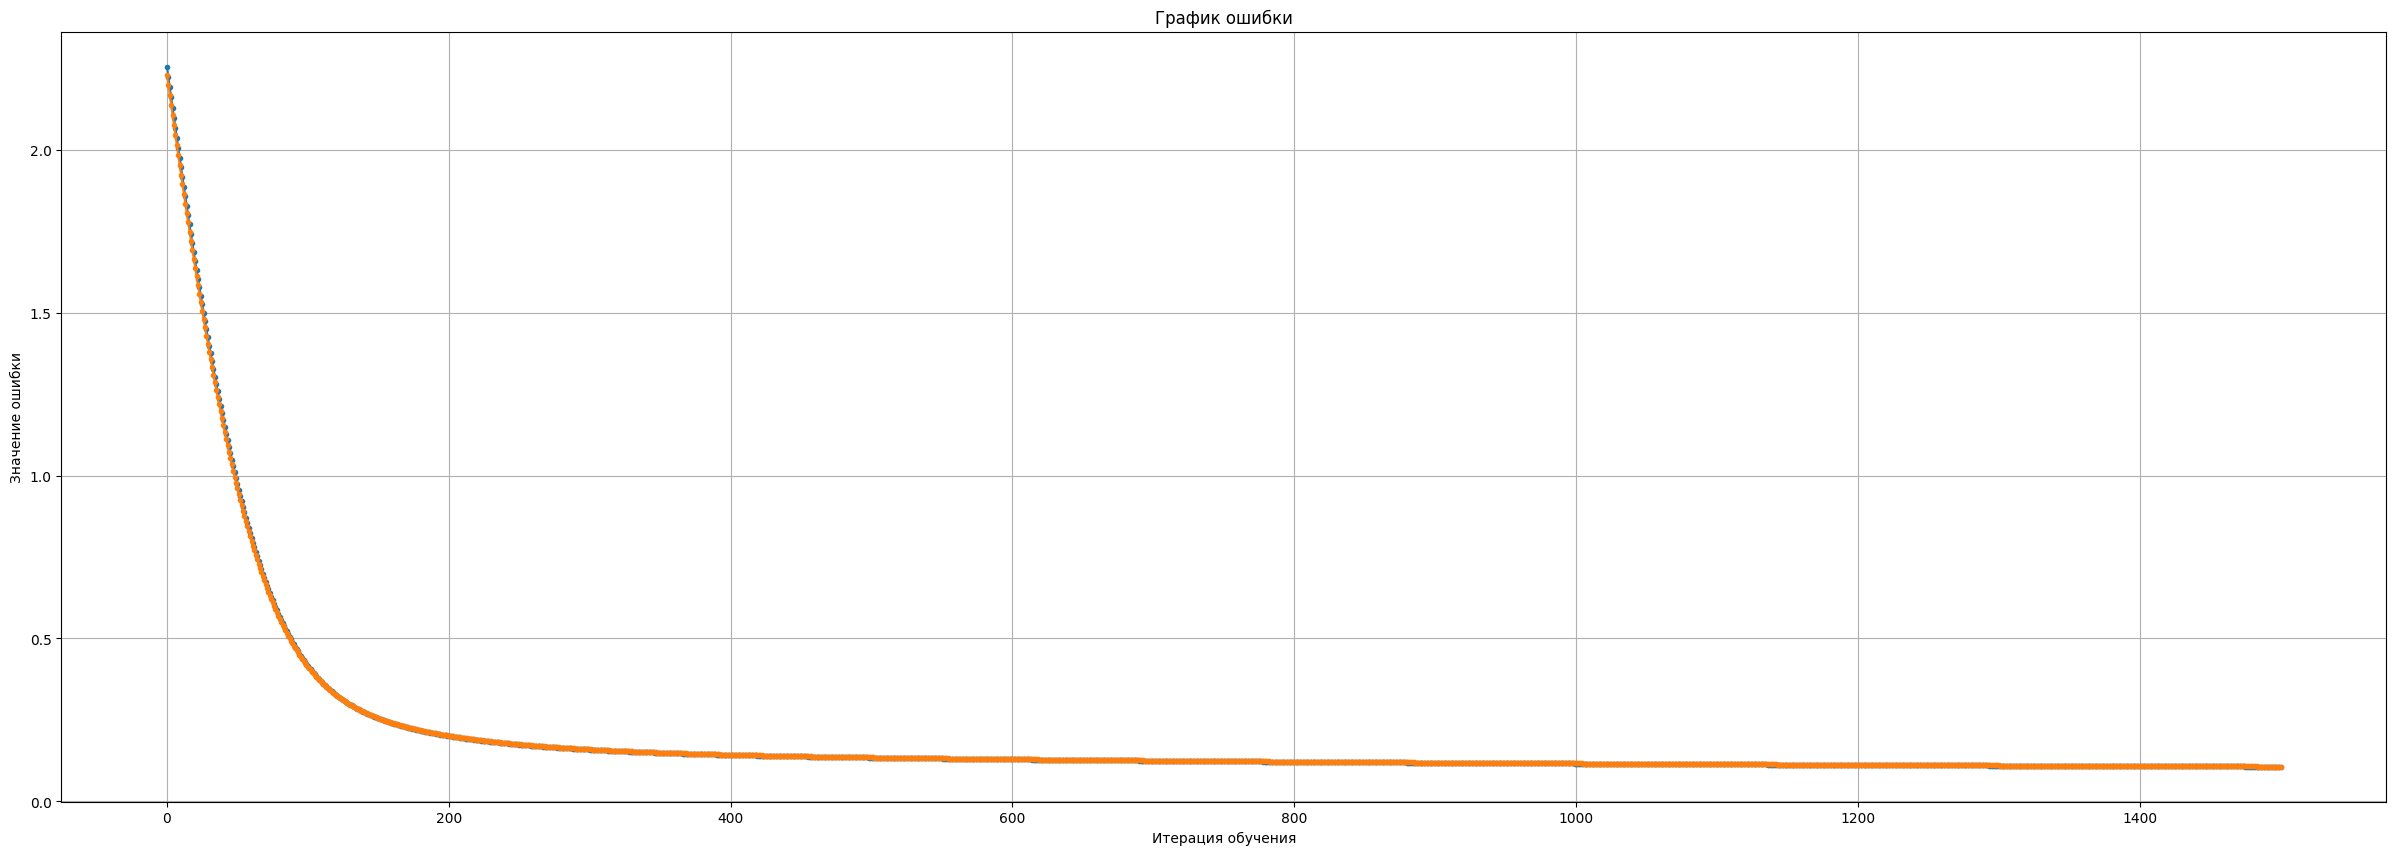

In [11]:
clear_output(True)
fig, ax = plt.subplots(figsize=(30, 10))
plt.title("График ошибки")
plt.plot(losses, ".-")
plt.plot(test_losses, ".-", label = "dsd")

plt.xlabel("Итерация обучения")
plt.ylabel("Значение ошибки")
plt.grid()
plt.show()

In [9]:
print(f'Итоговая точность: {bdorch.get_acc(y_test, model(x_test)):.2f}%')

Итоговая точность: 95.30%
